In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car = pd.read_csv('car.data', header = None)

In [3]:
car.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
col_names = ['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [5]:
car.columns = col_names

In [6]:
car

,buying,maintenance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   safety       1728 non-null   object
 6   class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
car.isnull().sum()

buying         0
maintenance    0
doors          0
persons        0
lug_boot       0
safety         0
class          0
dtype: int64

In [9]:
car.duplicated().sum()

0

In [10]:
car.describe()

,buying,maintenance,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [11]:
car['buying'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

In [12]:
car['maintenance'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: maintenance, dtype: int64

In [13]:
car['doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

In [14]:
car['persons'].value_counts()

2       576
4       576
more    576
Name: persons, dtype: int64

In [15]:
car['lug_boot'].value_counts()

small    576
med      576
big      576
Name: lug_boot, dtype: int64

In [16]:
car['safety'].value_counts()

low     576
med     576
high    576
Name: safety, dtype: int64

In [17]:
car['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [18]:
for i in car.columns:
    print(car[i].unique(),"\t",car[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [19]:
for i in car.columns:
    print(car[i].value_counts())
    print()


vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

vhigh    432
high     432
med      432
low      432
Name: maintenance, dtype: int64

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

2       576
4       576
more    576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

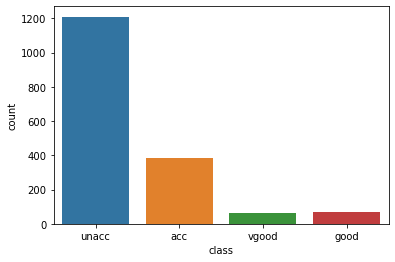

In [20]:
sns.countplot(car['class'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

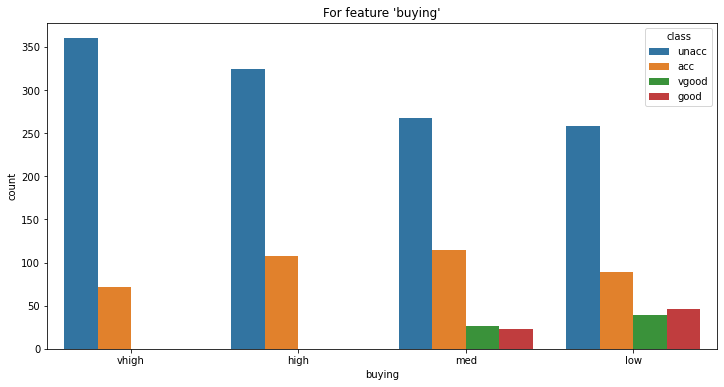

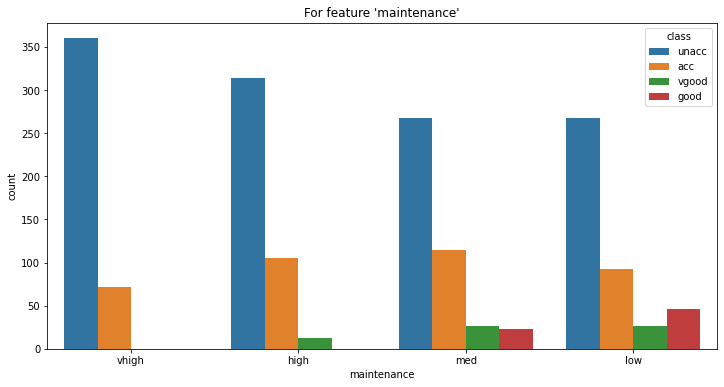

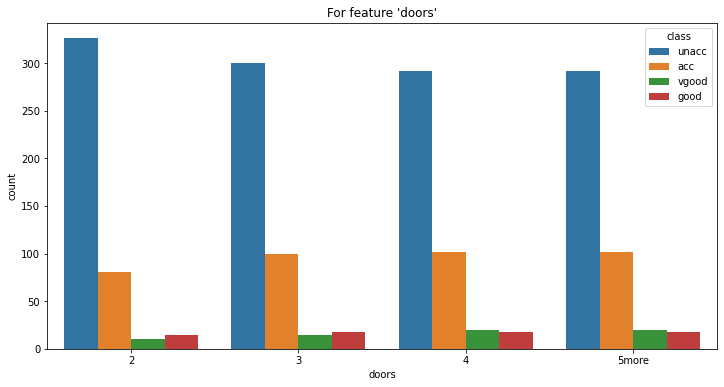

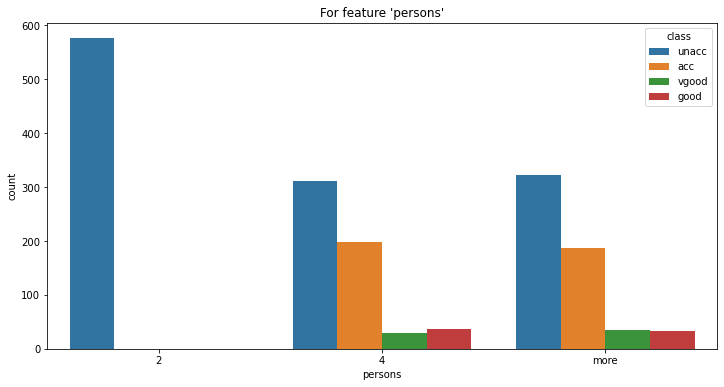

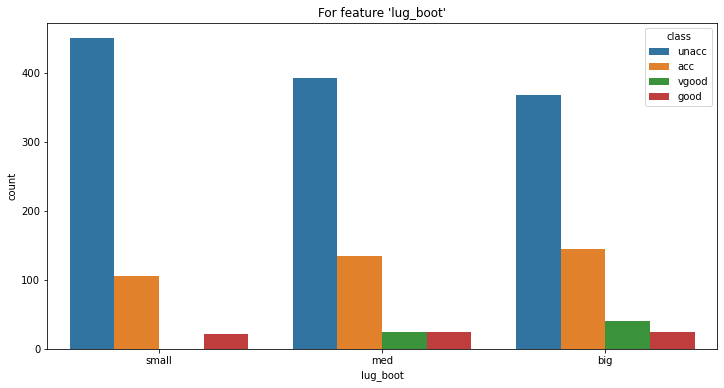

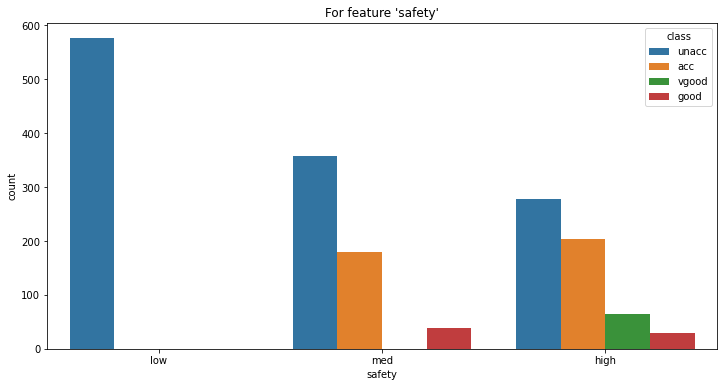

In [21]:
for i in car.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(car[i],hue=car['class'])

In [22]:
#warnings
import warnings
warnings.simplefilter(action='ignore')

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

In [25]:
for i in car.columns:
    car[i]=le.fit_transform(car[i])

In [26]:
car.head()

,buying,maintenance,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [27]:
for i in car.columns:
    print(car[i].unique(),"\t",car[i].nunique())

[3 0 2 1] 	 4
[3 0 2 1] 	 4
[0 1 2 3] 	 4
[0 1 2] 	 3
[2 1 0] 	 3
[1 2 0] 	 3
[2 0 3 1] 	 4


<AxesSubplot:>

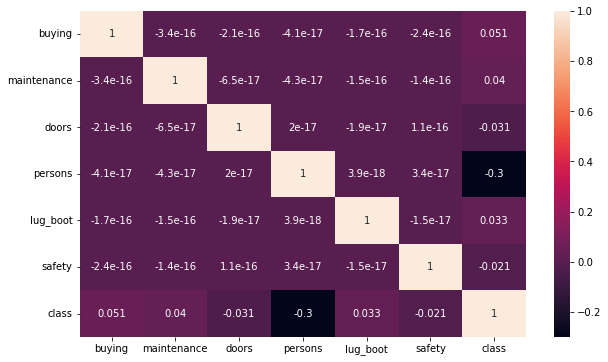

In [28]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(car.corr(),annot=True)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = car
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = car.columns
vif

,VIF,Features
0,2.537474,buying
1,2.522938,maintenance
2,2.443242,doors
3,2.165404,persons
4,2.290247,lug_boot
5,2.240569,safety
6,3.221251,class


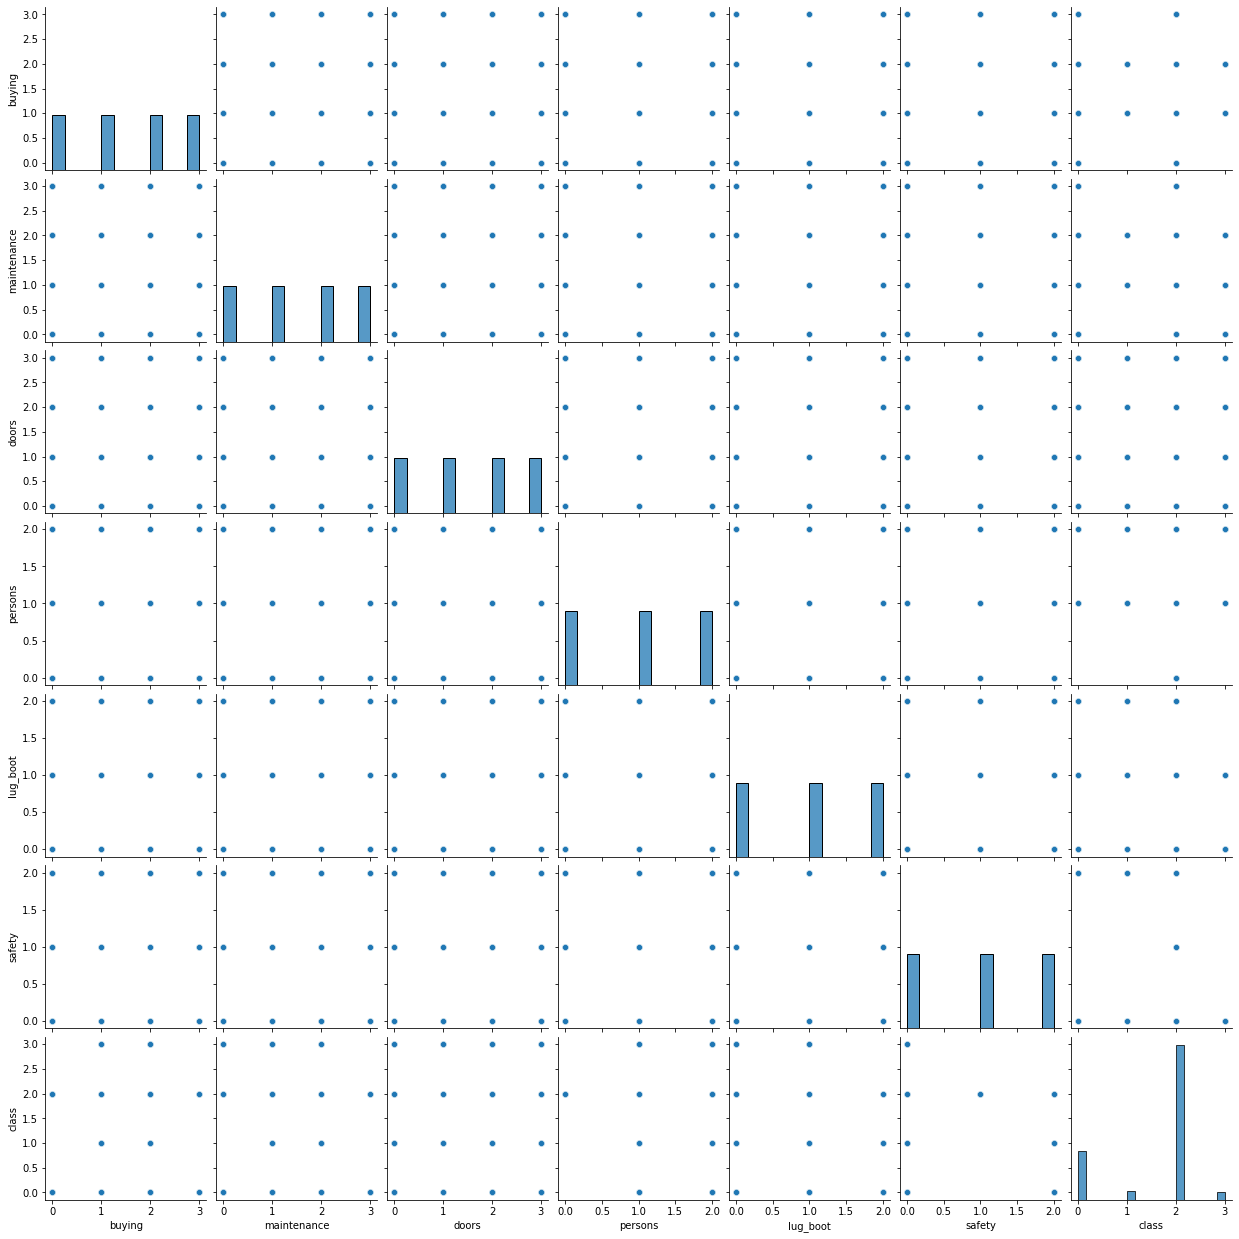

In [30]:
sns.pairplot(car)

In [31]:
for k, v in car.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(car)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column buying outliers = 0.00%
Column maintenance outliers = 0.00%
Column doors outliers = 0.00%
Column persons outliers = 0.00%
Column lug_boot outliers = 0.00%
Column safety outliers = 0.00%
Column class outliers = 0.00%


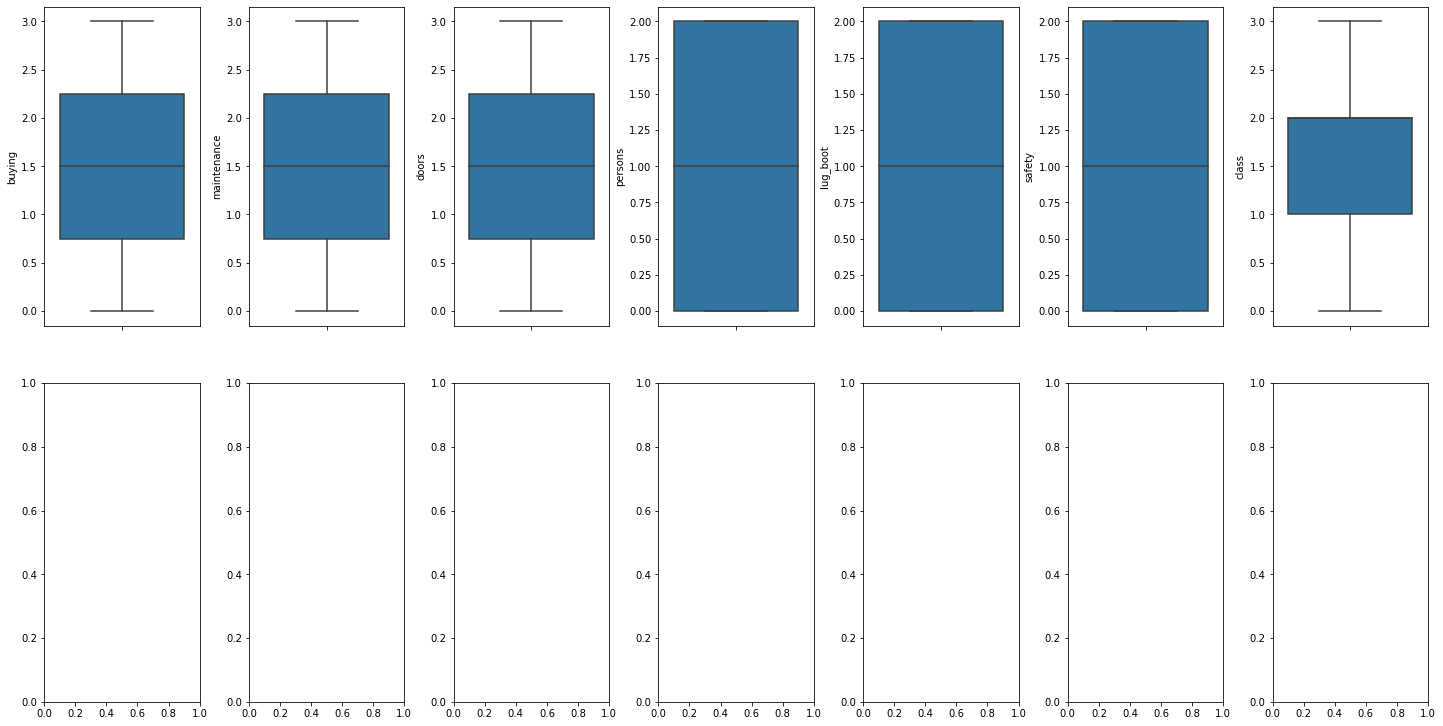

In [32]:
import seaborn as sns
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in car.items():
    sns.boxplot(y=k, data=car, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = car.drop(columns ='class')
Y = car['class']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.25, random_state = 42)

In [36]:
print("X_train shape: ", x_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", x_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (1296, 6)
Y_train shape:  (1296,)
X_test shape:  (432, 6)
Y_test shape:  (432,)


## Random Forest Regressor

In [37]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
# Model prediction on train data
y_pred = reg.predict(x_train)

In [39]:
from sklearn import metrics

In [40]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9888681079011602
Adjusted R^2: 0.9888162914910803
MAE: 0.03875000000000001
MSE: 0.008343981481481482
RMSE: 0.09134539660804743


In [41]:
# Predicting Test data with the model
y_test_pred = reg.predict(x_test)

In [42]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8811661224730359
Adjusted R^2: 0.8794884677314788
MAE: 0.12979166666666664
MSE: 0.09723449074074074
RMSE: 0.3118244550075262


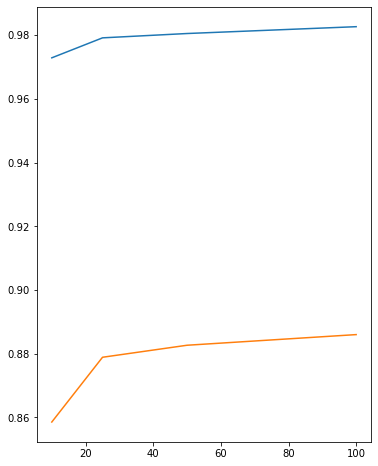

In [52]:
param_range=[10,25,50,100]
curve=validation_curve(reg,x_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

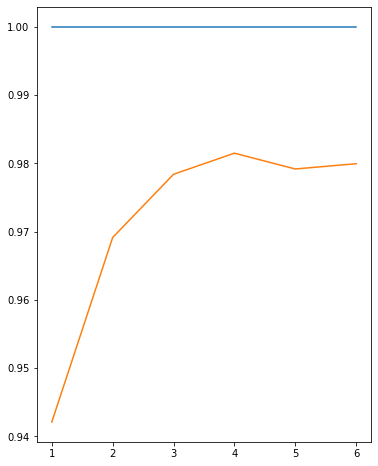

In [53]:

from sklearn.ensemble import RandomForestClassifier
param_range=range(1,len(X.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),x_train,y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range


In [48]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [49]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [50]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                              random_state=51),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'max_features': [2, 4, 6, 'auto'],
                         'max_leaf_nodes': [2, 3, None]})

In [54]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 6, 'max_leaf_nodes': None}
0.9784197972570066


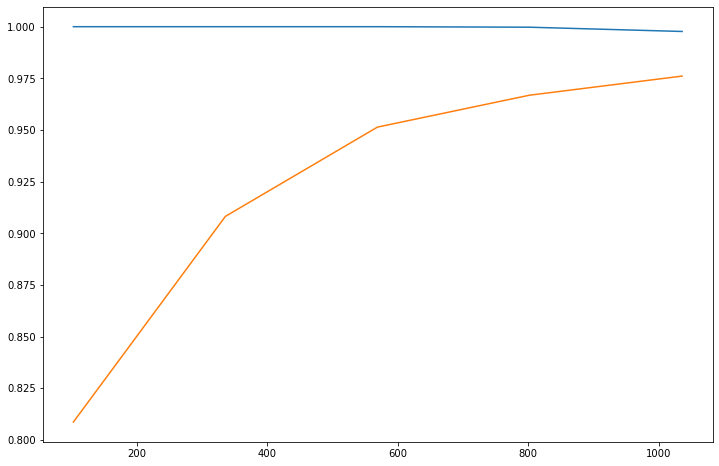

In [55]:
lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=6,max_depth=10,random_state=51,
                                             max_leaf_nodes=None,n_jobs=-1,),x_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)


In [56]:
print(X.columns)
print(reg.feature_importances_)

Index(['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
[0.22021977 0.24064195 0.06834166 0.15727146 0.11602819 0.19749697]


## Support Vector Machine Algorithm

In [57]:
from sklearn import svm

In [58]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(x_train,y_train)
svm_score = model.score(x_test, y_test)
svm_score

0.9768518518518519

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Logistic Regression

In [60]:
log =LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [61]:
log.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [62]:
log.score(x_train,y_train)

0.7060185185185185

In [63]:
pred=log.predict(x_test)
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 3, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,

In [64]:
log_score = log.score(x_test,y_test)
log_score

0.6620370370370371

In [65]:
from sklearn.model_selection import learning_curve

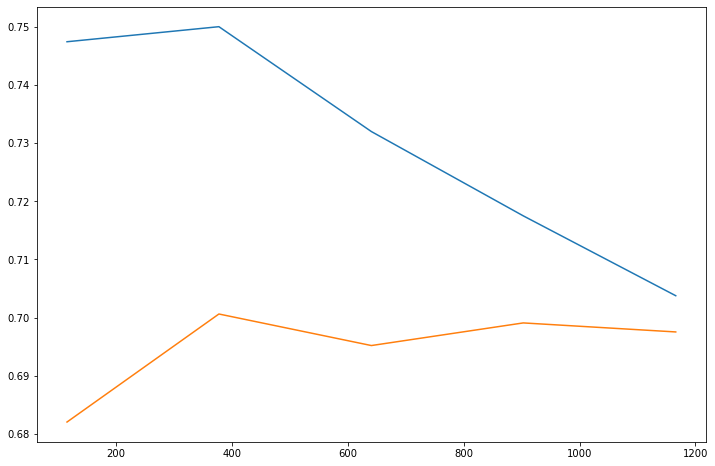

In [66]:
lc=learning_curve(log,x_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

In [67]:
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(log,x_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1,)

In [68]:
curve

(array([[0.70656371, 0.70684667, 0.70684667, 0.70684667, 0.70684667],
        [0.70656371, 0.70684667, 0.70684667, 0.70684667, 0.70684667],
        [0.7027027 , 0.70781099, 0.71263259, 0.70973963, 0.70491803],
        [0.70656371, 0.70781099, 0.70395371, 0.70588235, 0.70588235]]),
 array([[0.70769231, 0.70656371, 0.70656371, 0.70656371, 0.70656371],
        [0.70769231, 0.70656371, 0.70656371, 0.70656371, 0.70656371],
        [0.72307692, 0.67953668, 0.69111969, 0.68725869, 0.7027027 ],
        [0.70384615, 0.67181467, 0.70656371, 0.69498069, 0.71042471]]))

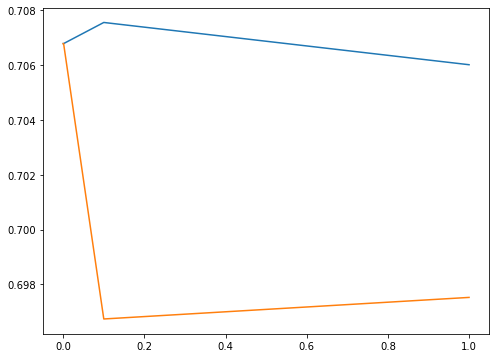

In [69]:
n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [70]:
param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [71]:
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']})

In [72]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.709097119097119


## KNN Classifier

In [73]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
y_pred = knn.predict(x_test)

In [75]:
knn.score(x_train,y_train)

0.9483024691358025

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [77]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.8865740740740741


In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       103
           1       0.50      0.40      0.44        15
           2       0.91      1.00      0.95       294
           3       1.00      0.55      0.71        20

    accuracy                           0.89       432
   macro avg       0.81      0.66      0.72       432
weighted avg       0.88      0.89      0.88       432



In [79]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())


Text(0, 0.5, 'accuracy')

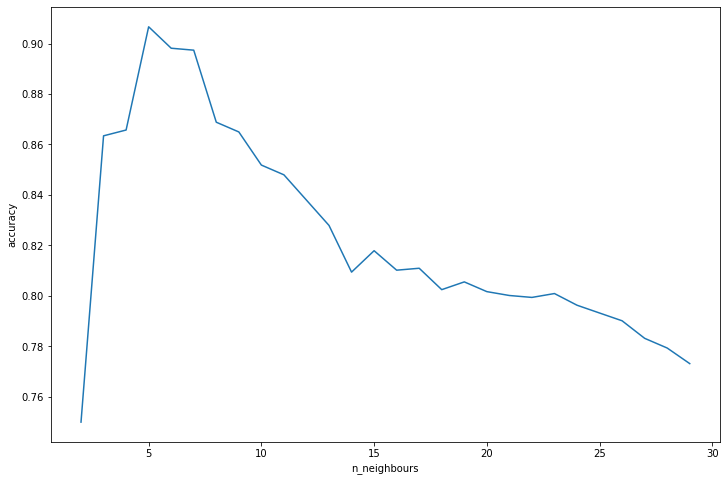

In [80]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))


In [81]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [82]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [83]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.858 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.865 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.846 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.903 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3;, score=0.896 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.915 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.907 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.892 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.903 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5;, score=0.931 total 

[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=5;, score=0.931 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.912 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.896 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.861 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.919 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=7;, score=0.927 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.896 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.857 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.842 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=25, n_neighbors=9;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=25, n_

[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.846 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.830 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.873 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=10;, score=0.896 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.862 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.846 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.830 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.861 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=11;, score=0.880 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, n_neighbors=12;, score=0.842 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_s

[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=12;, score=0.819 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=12;, score=0.869 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=12;, score=0.861 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=13;, score=0.846 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=13;, score=0.819 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=13;, score=0.826 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=13;, score=0.846 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=34, n_neighbors=13;, score=0.876 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=3;, score=0.873 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=18, n_neighbors=3;, score=0.846 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=18, 

[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=3;, score=0.846 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=3;, score=0.834 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=3;, score=0.869 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=3;, score=0.896 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=5;, score=0.919 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=5;, score=0.896 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=5;, score=0.892 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=5;, score=0.900 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=5;, score=0.927 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.923 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=25, n_neighbors=7;, score=0.

[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7;, score=0.923 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=7;, score=0.934 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.881 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.830 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.826 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.884 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=9;, score=0.903 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.881 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.822 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, score=0.803 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, n_neighbors=10;, scor

[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=10;, score=0.815 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=10;, score=0.880 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=10;, score=0.880 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=11;, score=0.885 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=11;, score=0.822 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=11;, score=0.784 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=11;, score=0.853 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=11;, score=0.865 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.877 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12;, score=0.811 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=34, n_neighbors=12

[CV 2/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.822 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.822 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.846 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, n_neighbors=13;, score=0.865 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.873 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.900 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.838 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.876 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=25, n_neighbors=3;, score=0.888 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.946 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=25, n_neighbors=5;, score=0.903 total time=   

[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.903 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.903 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.911 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=5;, score=0.931 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.935 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.857 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.873 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.884 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, n_neighbors=7;, score=0.923 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, n_neighbors=9;, score=0.908 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, n_neighbors=9;, score=0.853 total time=   0.0s

[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=9;, score=0.903 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.896 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.830 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.826 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.861 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=10;, score=0.880 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.888 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.846 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.849 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.853 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=34, n_neighbors=11;, score=0.876 total ti

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1, n_neighbors=29),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [ ]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_

In [ ]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
knn.score(x_train,y_train)

In [ ]:
knn_score = knn.score(x_test,y_test)
knn_score

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
#k-fold cross validation
kfold = KFold(n_splits=12)
kfold.get_n_splits(X)

In [88]:
from sklearn.model_selection import KFold
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in KFold.split(X):
    X_train, X_test = X[train_index], X[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(x_train,y_train)
    test_score_ =  knn.score(x_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

TypeError: split() missing 1 required positional argument: 'X'

## Decision Tree Classifier with criterion gini index 

In [89]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [90]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [91]:
y_pred_gini = clf_gini.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7569


In [93]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([2, 2, 2, ..., 0, 2, 2])

In [94]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7762


In [95]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.7762
Test set score: 0.7569


[Text(0.375, 0.875, 'X[3] <= 0.5\ngini = 0.45\nsamples = 1296\nvalue = [281, 54, 916, 45]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 426\nvalue = [0, 0, 426, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\ngini = 0.572\nsamples = 870\nvalue = [281, 54, 490, 45]'),
 Text(0.25, 0.375, 'X[0] <= 2.5\ngini = 0.63\nsamples = 284\nvalue = [152, 22, 65, 45]'),
 Text(0.125, 0.125, 'gini = 0.62\nsamples = 211\nvalue = [117, 22, 27, 45]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 73\nvalue = [35, 0, 38, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\ngini = 0.423\nsamples = 586\nvalue = [129, 32, 425, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 294\nvalue = [0, 0, 294, 0]'),
 Text(0.875, 0.125, 'gini = 0.592\nsamples = 292\nvalue = [129, 32, 131, 0]')]

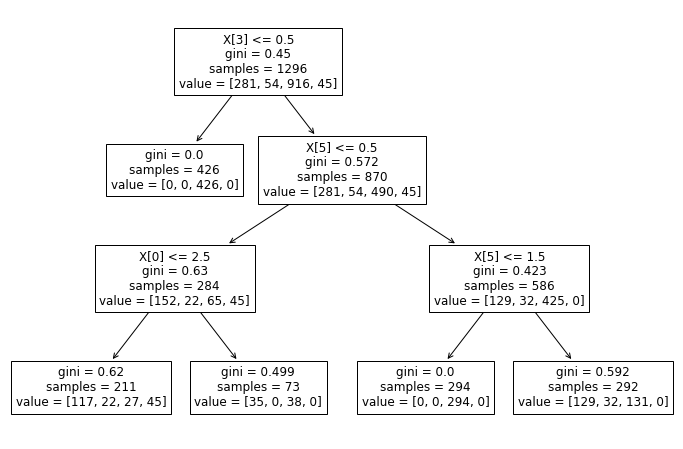

In [96]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [97]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

TypeError: can only concatenate str (not "numpy.int32") to str

## Decision Tree Classifier with criterion entropy

In [98]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [99]:
y_pred_en = clf_en.predict(x_test)

In [100]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7569


In [101]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([2, 2, 2, ..., 0, 2, 2])

In [102]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7762


In [103]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Training set score: 0.7762
Test set score: 0.7569


[Text(0.375, 0.875, 'X[3] <= 0.5\nentropy = 1.191\nsamples = 1296\nvalue = [281, 54, 916, 45]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 426\nvalue = [0, 0, 426, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\nentropy = 1.463\nsamples = 870\nvalue = [281, 54, 490, 45]'),
 Text(0.25, 0.375, 'X[0] <= 2.5\nentropy = 1.677\nsamples = 284\nvalue = [152, 22, 65, 45]'),
 Text(0.125, 0.125, 'entropy = 1.667\nsamples = 211\nvalue = [117, 22, 27, 45]'),
 Text(0.375, 0.125, 'entropy = 0.999\nsamples = 73\nvalue = [35, 0, 38, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\nentropy = 1.046\nsamples = 586\nvalue = [129, 32, 425, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 294\nvalue = [0, 0, 294, 0]'),
 Text(0.875, 0.125, 'entropy = 1.389\nsamples = 292\nvalue = [129, 32, 131, 0]')]

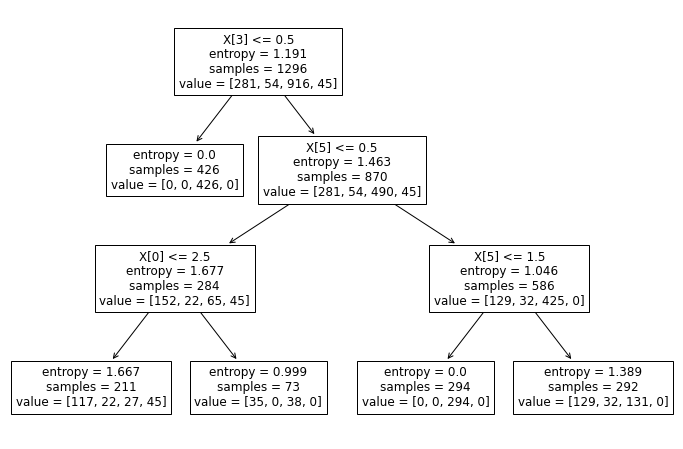

In [104]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train)) 

In [105]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 41   0  62   0]
 [  8   0   7   0]
 [  8   0 286   0]
 [ 20   0   0   0]]


In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.53      0.40      0.46       103
           1       0.00      0.00      0.00        15
           2       0.81      0.97      0.88       294
           3       0.00      0.00      0.00        20

    accuracy                           0.76       432
   macro avg       0.33      0.34      0.33       432
weighted avg       0.68      0.76      0.71       432



In [107]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
             'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : [18,20,25,27,30,32,34],
             'n_neighbors' : [3,5,7,9,10,11,12,13]
        }
    },
    'Decision_Tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini', 'entropy'],
            'max_depth' : range(2,32,1),
            'min_samples_leaf' : range(1,10,1),
            'min_samples_split': range(2,10,1),
            'splitter' : ['best', 'random']
        }
    }
}

In [109]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.983787,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.949831,{'n_estimators': 10}
2,logistic_regression,0.699064,{'C': 1}
3,knn,0.918960,"{'algorithm': 'brute', 'leaf_size': 18, 'n_nei..."
4,Decision_Tree,0.980710,"{'criterion': 'entropy', 'max_depth': 19, 'min..."


In [110]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_test, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.932879,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.872895,{'n_estimators': 5}
2,logistic_regression,0.657338,{'C': 1}
3,knn,0.826250,"{'algorithm': 'ball_tree', 'leaf_size': 25, 'n..."
4,Decision_Tree,0.930553,"{'criterion': 'entropy', 'max_depth': 23, 'min..."


In [113]:
models = ['SVM', 'random_forest', 'logistic_regression', 'knn', 'Decision_Tree']
model_accuracy = [best_score]

fig = plt.figure(figsize=(7, 4))
plt.bar(models, model_accuracy, width=0.4)
plt.title('Most Accurate Model for Predictions')
plt.xlabel('Models Implemented on the Dataset')
plt.ylabel('Accuracy for the Implemented Model')
plt.show()

NameError: name 'best_score' is not defined